# **Identifikasi train**

In [72]:
import io
import pandas as pd

In [73]:
test = pd.read_csv('/content/Data Test.csv')
train = pd.read_csv('/content/Data Train.csv')

In [74]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [75]:
train.shape

(4250, 20)

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [77]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## **EDA**

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [80]:
count_churn = train['churn'].value_counts()
index_churn = count_churn.index
value_churn = count_churn.values

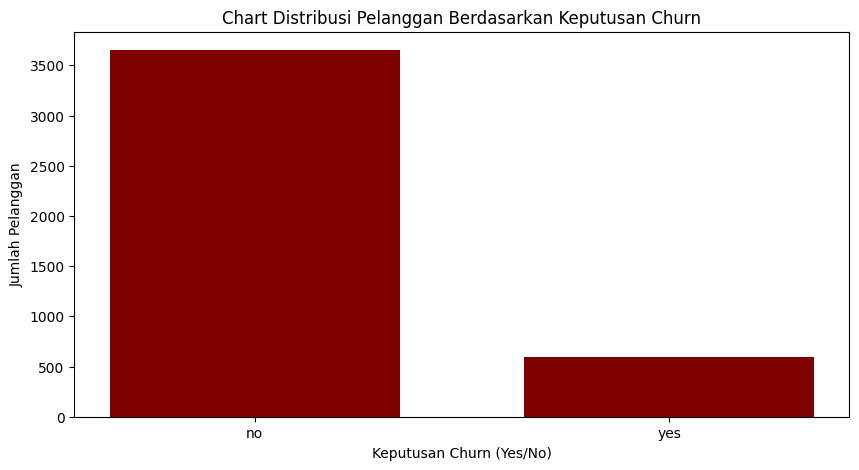

In [81]:
fig = plt.figure(figsize = (10, 5) )
plt.bar(index_churn, value_churn , color = "maroon",  width = 0.7)

plt.xlabel("Keputusan Churn (Yes/No)")
plt.ylabel("Jumlah Pelanggan")
plt.title("Chart Distribusi Pelanggan Berdasarkan Keputusan Churn")

plt.show()

In [82]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.xlabel("Keberadaan Paket Internasional (Yes/No)")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Pelanggan Berdasarkan Keberadaan Paket Internasional")
  plt.show()

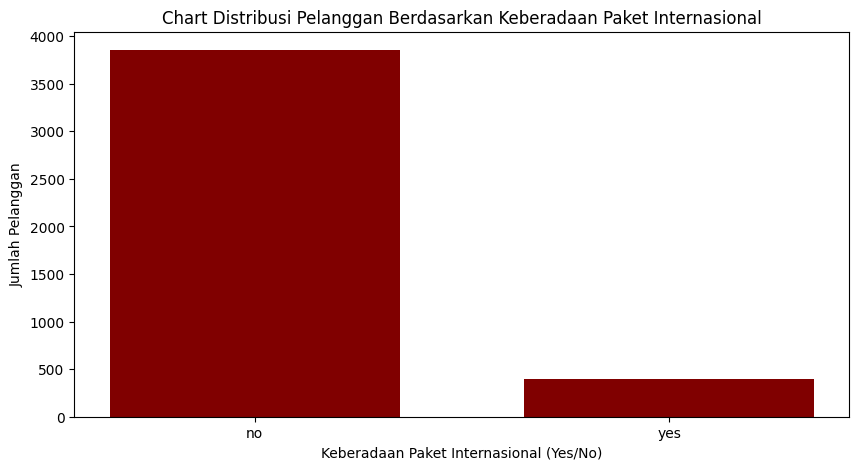

In [83]:
 bar_chart("international_plan")

In [84]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.07)

  plt.xlabel("Total Menit Panggilan Internasional")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Total Menit Panggilan Internasional")
  plt.show()

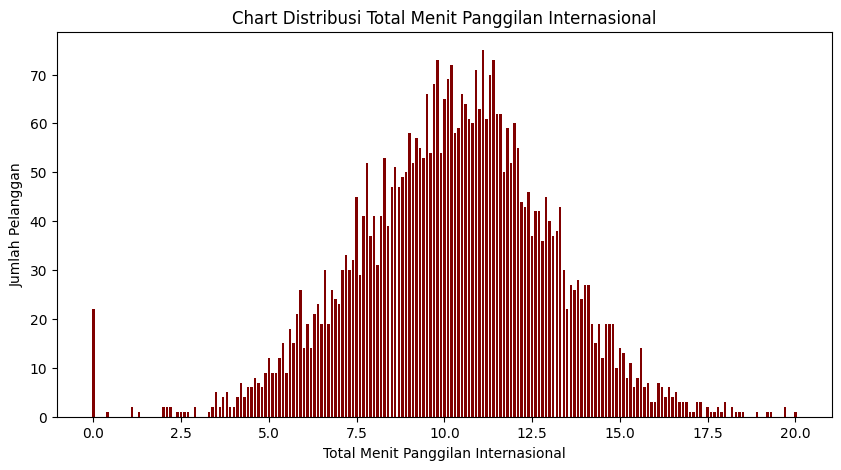

In [85]:
  bar_chart("total_intl_minutes")

In [86]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.xlabel("Total Panggilan Internasional")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Total Panggilan Internasional yang Dilakukan oleh Pelanggan")
  plt.show()

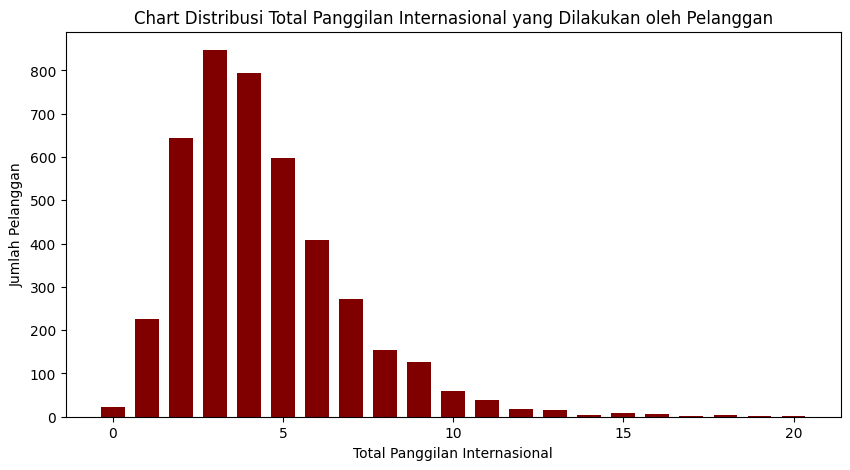

In [87]:
  bar_chart("total_intl_calls")

In [88]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.02)

  plt.xlabel("Total Biaya Panggilan Internasional")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Total Biaya Panggilan Internasional")
  plt.show()

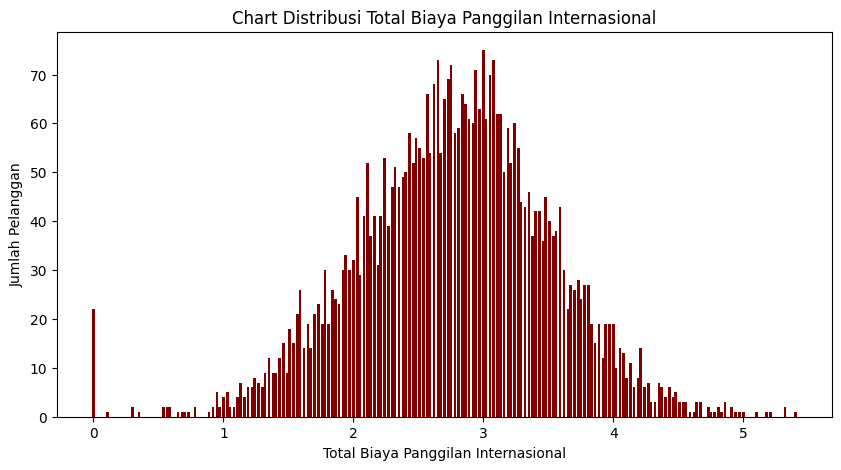

In [89]:
  bar_chart("total_intl_charge")

In [90]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.xlabel("Keberadaan Paket Voice Mail (Yes/No)")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Pelanggan Berdasarkan Keberadaan Paket Voice Mail")
  plt.show()

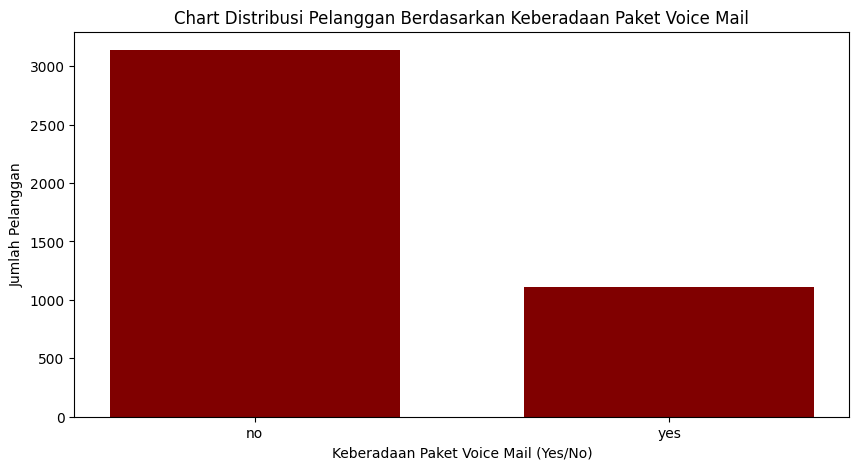

In [91]:
  bar_chart("voice_mail_plan")

In [92]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.xlabel("Jumlah Pesan Voicemail yang Diterima")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Jumlah Pesan Voicemail yang Diterima")
  plt.show()

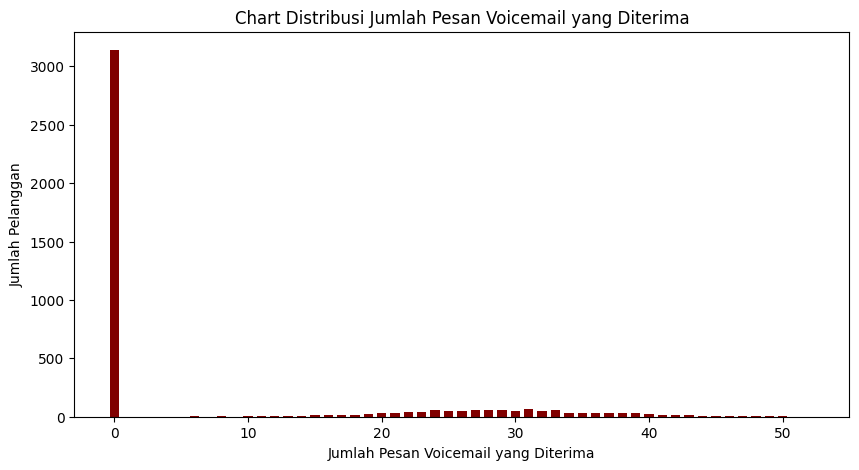

In [93]:
  bar_chart("number_vmail_messages")

In [94]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.xlabel("Total Menit Penggunaan pada Siang Hari")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Total Menit Penggunaan pada Siang Hari")
  plt.show()

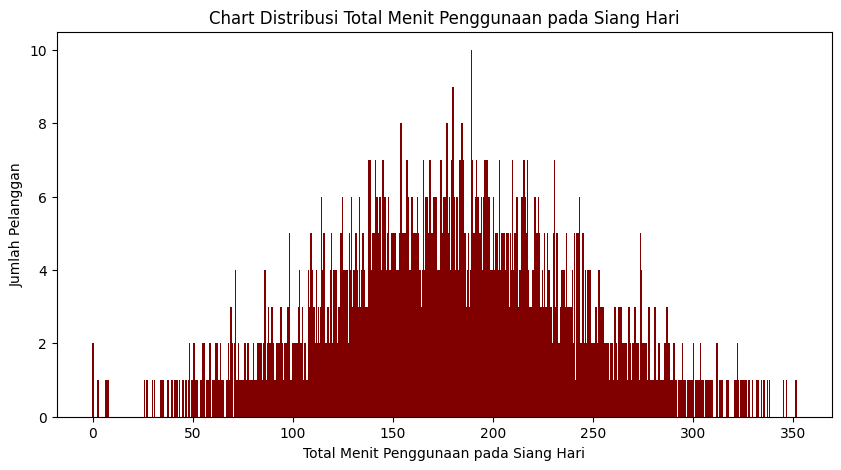

In [95]:
  bar_chart("total_day_minutes")

In [96]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.xlabel("Total Panggilan pada Siang Hari")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Total Panggilan pada Siang Hari")
  plt.show()

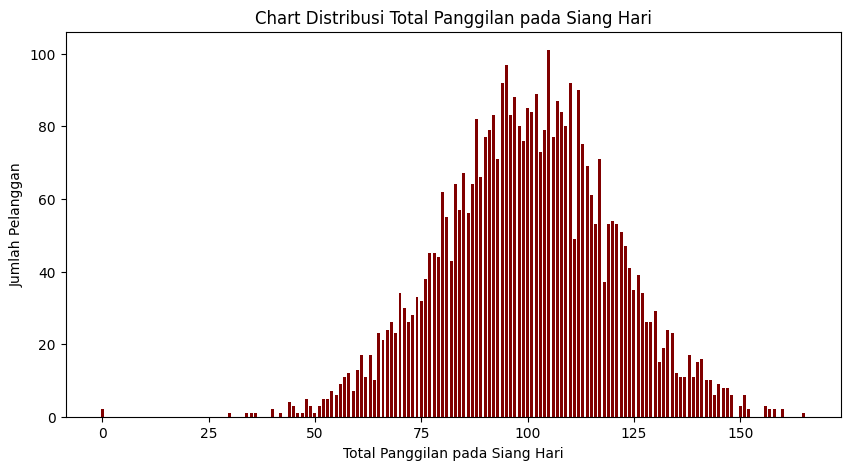

In [97]:
  bar_chart("total_day_calls")

In [98]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.07)

  plt.xlabel("Total Biaya Penggunaan pada Siang Hari")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Total Biaya Penggunaan pada Siang Hari")
  plt.show()

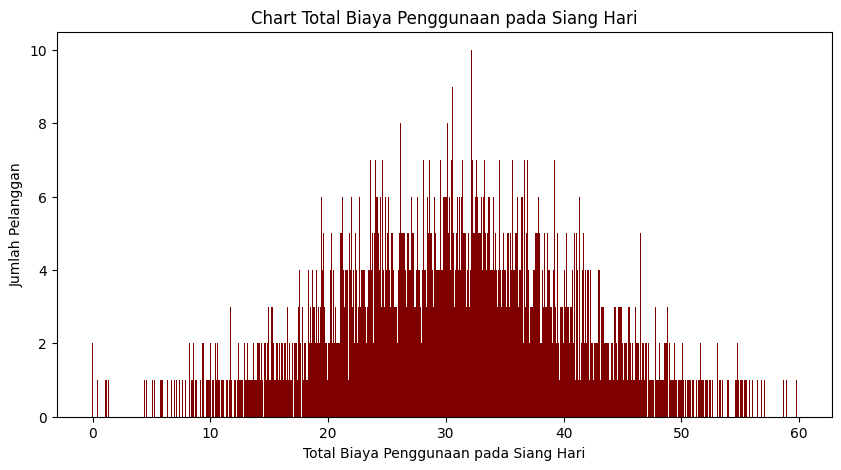

In [99]:
  bar_chart("total_day_charge")

In [100]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.xlabel("Total Menit Penggunaan pada Sore Hari")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Total Menit Penggunaan pada Sore Hari")
  plt.show()

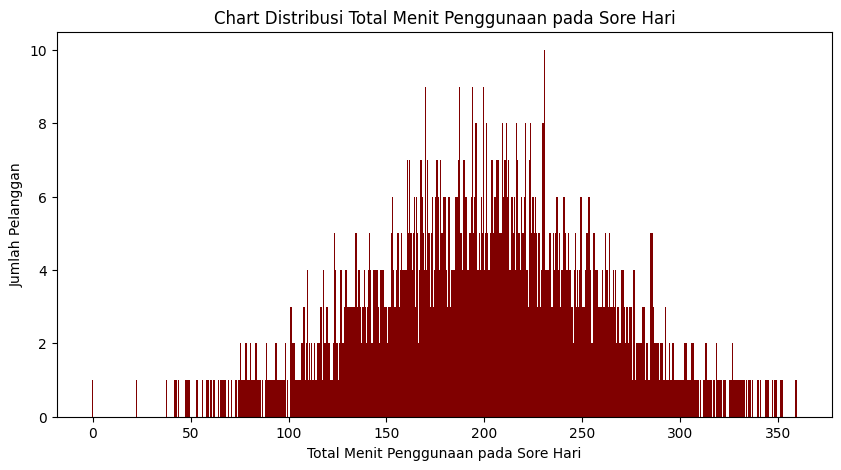

In [101]:
  bar_chart("total_eve_minutes")

In [102]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.xlabel("Total Panggilan pada Sore Hari")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Total Panggilan pada Sore Hari")
  plt.show()

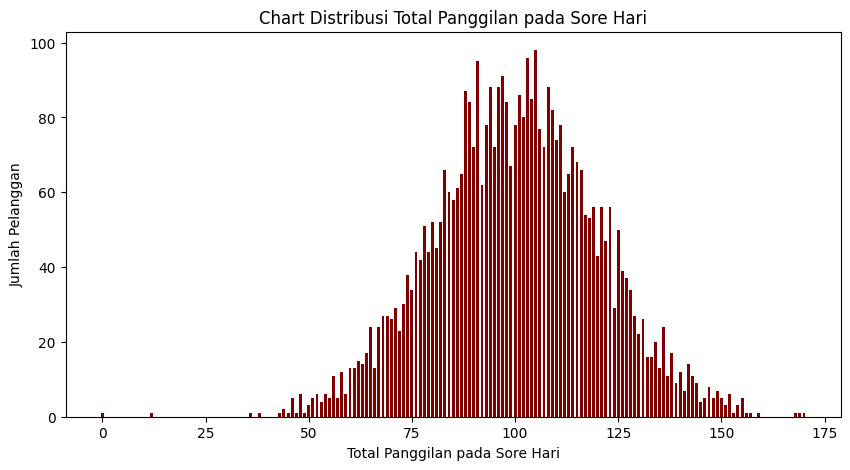

In [103]:
  bar_chart("total_eve_calls")

In [104]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.07)

  plt.xlabel("Total Biaya pada Sore Hari")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Total Biaya pada Sore Hari")
  plt.show()

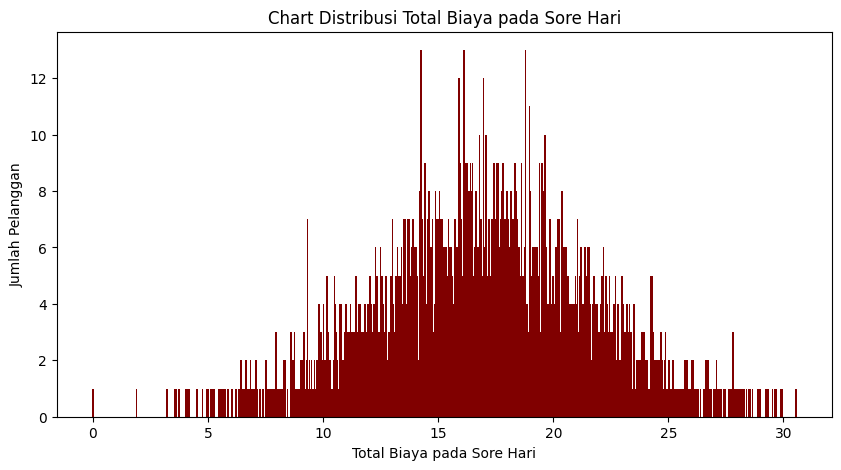

In [105]:
  bar_chart("total_eve_charge")

In [106]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.xlabel("Total Menit Penggunaan pada Malam Hari")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Total Menit Penggunaan pada Malam Hari")
  plt.show()

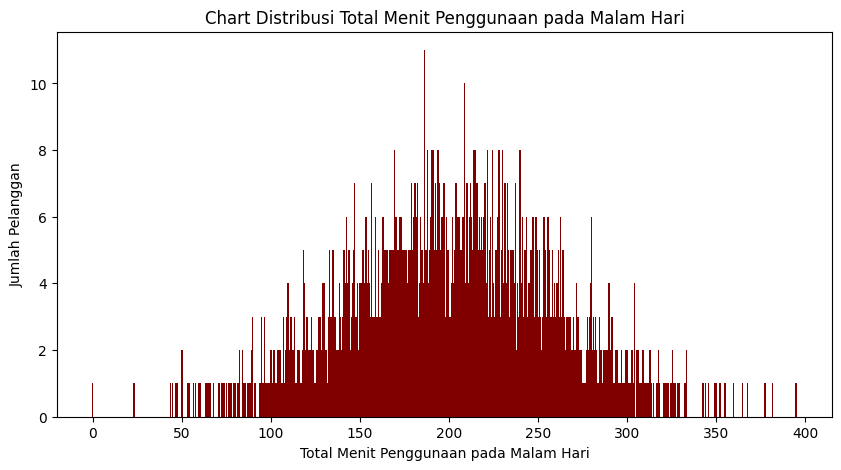

In [107]:
  bar_chart("total_night_minutes")

In [108]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.xlabel("Total Panggilan pada Malam Hari")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Total Panggilan pada Malam Hari")
  plt.show()

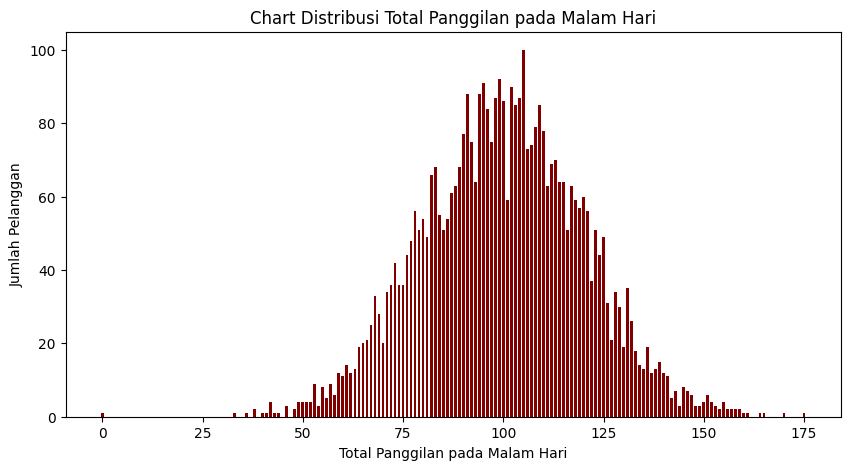

In [109]:
  bar_chart("total_night_calls")

In [110]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.07)

  plt.xlabel("Total Biaya pada Malam Hari")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Total Biaya pada Malam Hari")
  plt.show()

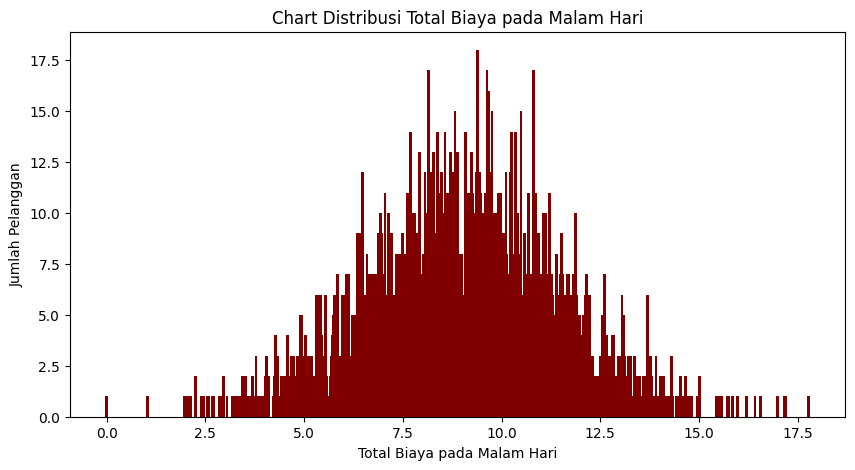

In [111]:
  bar_chart("total_night_charge")

In [112]:
def bar_chart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10,  5))
  plt.bar(index, values , color = "maroon", width = 0.7)

  plt.xlabel("Jumlah Panggilan ke Layanan Pelanggan")
  plt.ylabel("Jumlah Pelanggan")
  plt.title("Chart Distribusi Jumlah Panggilan ke Layanan Pelanggan")
  plt.show()

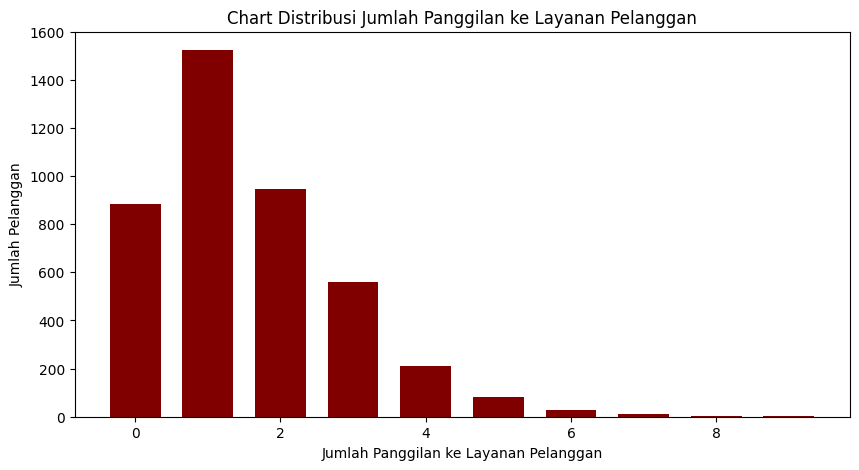

In [113]:
  bar_chart("number_customer_service_calls")

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

def group_barchart(column):
    churn = train.groupby(['churn', column]).size().reset_index(name='Count')

    g = sns.catplot(
        data = churn, kind='bar',
        x='churn', y='Count', hue=column,
        palette='dark', height=6
    )

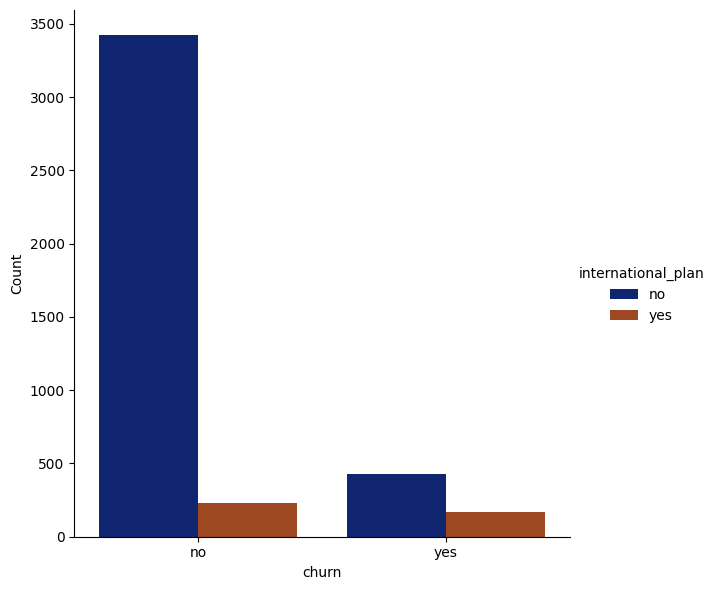

In [115]:
group_barchart('international_plan')

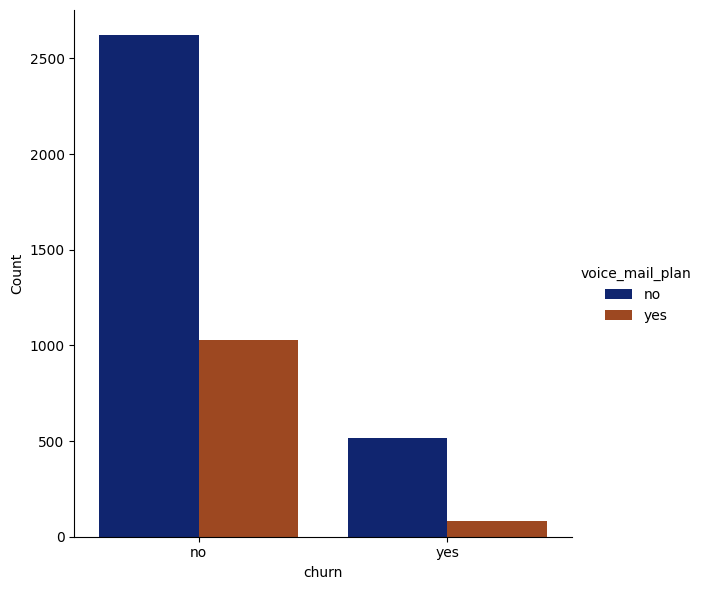

In [116]:
group_barchart('voice_mail_plan')

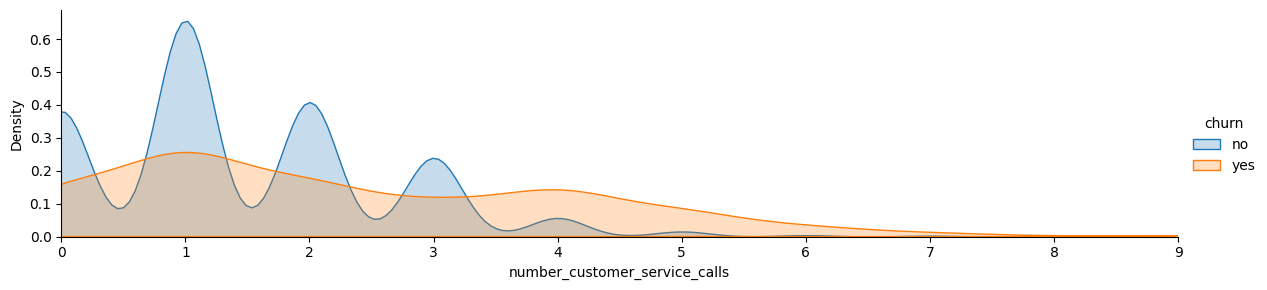

In [117]:
facet = sns.FacetGrid(train, hue="churn",aspect=4)
facet.map(sns.kdeplot,'number_customer_service_calls',fill= True)
facet.set(xlim=(0, train['number_customer_service_calls'].max()))
facet.add_legend()

plt.show()

## **PREPROCESSING DATA**

In [118]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [119]:
train.shape , test.shape

((4250, 20), (750, 20))

In [120]:
churn_mapping = {"yes" : 0, "no" : 1}

train['churn'] = train['churn'].map(churn_mapping)

In [121]:
voice_mail_plan_mapping = {"yes" : 0, "no" : 1}

train['voice_mail_plan'] = train['voice_mail_plan'].map(voice_mail_plan_mapping)
test['voice_mail_plan'] = test['voice_mail_plan'].map(voice_mail_plan_mapping)

In [122]:
international_plan_mapping = {"yes" : 0, "no" : 1}

train['international_plan'] = train['international_plan'].map(international_plan_mapping)
test['international_plan'] = test['international_plan'].map(international_plan_mapping)

In [123]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [124]:
test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [125]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,1,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1
1,NJ,137,area_code_415,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1
2,OH,84,area_code_408,0,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
3,OK,75,area_code_415,0,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1
4,MA,121,area_code_510,1,0,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,1


In [126]:
area_code = pd.get_dummies(train['area_code'])
area_code

,area_code_408,area_code_415,area_code_510
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
4245,0,1,0
4246,1,0,0
4247,1,0,0
4248,1,0,0


In [127]:
state = pd.get_dummies(train['state'])
state

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
train = pd.merge(train.reset_index(),  area_code.reset_index())
train = pd.merge(train.reset_index(),  state.reset_index())

In [129]:
train.head()

,level_0,index,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,OH,107,area_code_415,1,0,26,161.6,123,...,0,0,0,0,0,0,0,0,0,0
1,1,1,NJ,137,area_code_415,1,1,0,243.4,114,...,0,0,0,0,0,0,0,0,0,0
2,2,2,OH,84,area_code_408,0,1,0,299.4,71,...,0,0,0,0,0,0,0,0,0,0
3,3,3,OK,75,area_code_415,0,1,0,166.7,113,...,0,0,0,0,0,0,0,0,0,0
4,4,4,MA,121,area_code_510,1,0,24,218.2,88,...,0,0,0,0,0,0,0,0,0,0


In [130]:
train = train.drop(['level_0', 'index'], axis = 1)
train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,OH,107,area_code_415,1,0,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
1,NJ,137,area_code_415,1,1,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
2,OH,84,area_code_408,0,1,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
3,OK,75,area_code_415,0,1,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0
4,MA,121,area_code_510,1,0,24,218.2,88,37.09,348.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,1,1,0,188.3,70,32.01,243.8,...,0,0,0,0,0,0,0,0,0,0
4246,WV,73,area_code_408,1,1,0,177.9,89,30.24,131.2,...,0,0,0,0,0,0,0,0,1,0
4247,NC,75,area_code_408,1,1,0,170.7,101,29.02,193.1,...,0,0,0,0,0,0,0,0,0,0
4248,HI,50,area_code_408,1,0,40,235.7,127,40.07,223.0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
test = pd.merge(test.reset_index(),  area_code.reset_index())
test = pd.merge(test.reset_index(),  state.reset_index())

In [132]:
test

,level_0,index,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,1,KS,128,area_code_415,1,0,25,265.1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,AL,118,area_code_510,0,1,0,223.4,...,0,0,0,0,0,0,0,0,0,0
2,2,2,3,IA,62,area_code_415,1,1,0,120.7,...,0,0,0,0,0,0,0,0,0,0
3,3,3,4,VT,93,area_code_510,1,1,0,190.7,...,0,0,0,0,0,0,0,0,0,0
4,4,4,5,NE,174,area_code_415,1,1,0,124.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,745,745,746,GA,130,area_code_415,1,1,0,119.4,...,0,0,0,0,0,1,0,0,0,0
746,746,746,747,WA,73,area_code_408,1,1,0,177.2,...,0,0,0,0,0,0,0,0,0,0
747,747,747,748,WV,152,area_code_415,1,1,0,184.2,...,0,0,0,0,0,0,0,0,0,0
748,748,748,749,DC,61,area_code_415,1,1,0,140.6,...,0,0,0,0,0,0,0,0,0,0


In [133]:
test = test.drop(['level_0', 'index'], axis = 1)

In [134]:
test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,1,KS,128,area_code_415,1,0,25,265.1,110,45.07,...,0,0,0,0,0,0,0,0,0,0
1,2,AL,118,area_code_510,0,1,0,223.4,98,37.98,...,0,0,0,0,0,0,0,0,0,0
2,3,IA,62,area_code_415,1,1,0,120.7,70,20.52,...,0,0,0,0,0,0,0,0,0,0
3,4,VT,93,area_code_510,1,1,0,190.7,114,32.42,...,0,0,0,0,0,0,0,0,0,0
4,5,NE,174,area_code_415,1,1,0,124.3,76,21.13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,1,1,0,119.4,99,20.30,...,0,0,0,0,0,1,0,0,0,0
746,747,WA,73,area_code_408,1,1,0,177.2,118,30.12,...,0,0,0,0,0,0,0,0,0,0
747,748,WV,152,area_code_415,1,1,0,184.2,90,31.31,...,0,0,0,0,0,0,0,0,0,0
748,749,DC,61,area_code_415,1,1,0,140.6,89,23.90,...,0,0,0,0,0,0,0,0,0,0


In [135]:
train = train.drop(['state', 'area_code'], axis = 1)
train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,107,1,0,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
1,137,1,1,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
2,84,0,1,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
3,75,0,1,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0
4,121,1,0,24,218.2,88,37.09,348.5,108,29.62,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,1,1,0,188.3,70,32.01,243.8,88,20.72,...,0,0,0,0,0,0,0,0,0,0
4246,73,1,1,0,177.9,89,30.24,131.2,82,11.15,...,0,0,0,0,0,0,0,0,1,0
4247,75,1,1,0,170.7,101,29.02,193.1,126,16.41,...,0,0,0,0,0,0,0,0,0,0
4248,50,1,0,40,235.7,127,40.07,223.0,126,18.96,...,0,0,0,0,0,0,0,0,0,0


In [136]:
test = test.drop(['id', 'state', 'area_code'], axis = 1)
test

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,1,0,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,223.4,98,37.98,220.6,101,18.75,...,0,0,0,0,0,0,0,0,0,0
2,62,1,1,0,120.7,70,20.52,307.2,76,26.11,...,0,0,0,0,0,0,0,0,0,0
3,93,1,1,0,190.7,114,32.42,218.2,111,18.55,...,0,0,0,0,0,0,0,0,0,0
4,174,1,1,0,124.3,76,21.13,277.1,112,23.55,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,1,1,0,119.4,99,20.30,226.3,97,19.24,...,0,0,0,0,0,1,0,0,0,0
746,73,1,1,0,177.2,118,30.12,270.5,84,22.99,...,0,0,0,0,0,0,0,0,0,0
747,152,1,1,0,184.2,90,31.31,256.8,73,21.83,...,0,0,0,0,0,0,0,0,0,0
748,61,1,1,0,140.6,89,23.90,172.8,128,14.69,...,0,0,0,0,0,0,0,0,0,0


## **Modelling**

In [137]:
train.shape, test.shape

((4250, 72), (750, 71))

In [138]:
train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,107,1,0,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
1,137,1,1,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
2,84,0,1,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
3,75,0,1,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0
4,121,1,0,24,218.2,88,37.09,348.5,108,29.62,...,0,0,0,0,0,0,0,0,0,0


In [139]:
test.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,1,0,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,223.4,98,37.98,220.6,101,18.75,...,0,0,0,0,0,0,0,0,0,0
2,62,1,1,0,120.7,70,20.52,307.2,76,26.11,...,0,0,0,0,0,0,0,0,0,0
3,93,1,1,0,190.7,114,32.42,218.2,111,18.55,...,0,0,0,0,0,0,0,0,0,0
4,174,1,1,0,124.3,76,21.13,277.1,112,23.55,...,0,0,0,0,0,0,0,0,0,0


In [140]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [141]:
train_data = train.drop("churn",axis = 1 )
target = train['churn']

In [142]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.61882353 0.58352941 0.64117647 0.60235294 0.54117647]


In [143]:
score.mean()

0.5974117647058822

In [144]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.92470588 0.93411765 0.91882353 0.93411765 0.91882353]


In [145]:
score.mean()

0.9261176470588236

In [146]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = KNeighborsClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.89882353 0.87647059 0.89176471 0.89176471 0.88352941]


In [147]:
score.mean()

0.8884705882352941

In [148]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.95411765 0.95764706 0.93882353 0.95176471 0.94823529]


In [149]:
score.mean()

0.9501176470588234

In [150]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.86470588 0.85647059 0.85764706 0.85411765 0.86352941]


In [151]:
score.mean()

0.8592941176470589

## **Prediction**

# -Klasifikasi Algoritma Naive Bayes

In [152]:
test.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,1,0,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,223.4,98,37.98,220.6,101,18.75,...,0,0,0,0,0,0,0,0,0,0
2,62,1,1,0,120.7,70,20.52,307.2,76,26.11,...,0,0,0,0,0,0,0,0,0,0
3,93,1,1,0,190.7,114,32.42,218.2,111,18.55,...,0,0,0,0,0,0,0,0,0,0
4,174,1,1,0,124.3,76,21.13,277.1,112,23.55,...,0,0,0,0,0,0,0,0,0,0


In [153]:
clf = GaussianNB()
clf.fit(train_data, target)

GaussianNB()

In [154]:
prediction = clf.predict(test)

In [155]:
df_test = pd.read_csv("Data Test.csv")
submission = pd.DataFrame({
        "id": df_test["id"],
        "churn": prediction
    })
submission.head()

,id,churn
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0


In [156]:
submission.to_csv("Prediksi Customer Churn.csv", index = False)

In [157]:
test['churn'] = submission['churn']
test.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,churn
0,128,1,0,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,1
1,118,0,1,0,223.4,98,37.98,220.6,101,18.75,...,0,0,0,0,0,0,0,0,0,0
2,62,1,1,0,120.7,70,20.52,307.2,76,26.11,...,0,0,0,0,0,0,0,0,0,1
3,93,1,1,0,190.7,114,32.42,218.2,111,18.55,...,0,0,0,0,0,0,0,0,0,0
4,174,1,1,0,124.3,76,21.13,277.1,112,23.55,...,0,0,0,0,0,0,0,0,0,0


# -Klasifikasi Algoritma K-Nearest Neighbors (K-NN)

In [200]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [201]:
X = train.drop('churn', axis=1)
y = train['churn']

In [202]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

In [203]:
# KNN
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
print(knn.predict(X_test))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [204]:
#KNN
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# Calculate the accuracy of the model
print(knn.score(X_test, y_test))


0.888235294117647


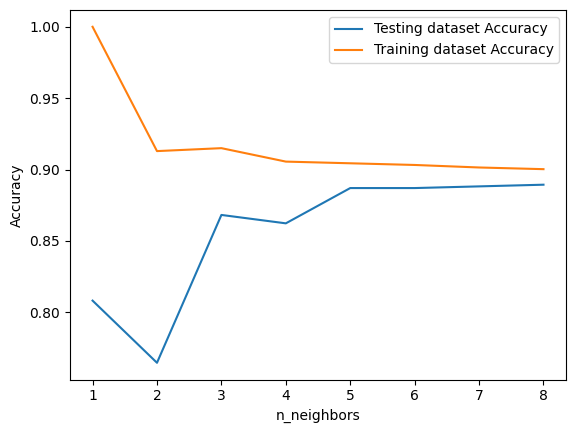

In [205]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# -Klasifikasi Algoritma Decision Tree

# -Klasifikasi Algoritma Random Forest

# -Klasifikasi Algoritma Support Vector Classification (SVC)